In [12]:
#updating gensim package
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#installing OCTIS for evaluation metrics
!pip install octis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#install pyLDAvis for visualizing LDA results
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=cc2e346a1071d6a2d6463c85a1152ac44f07fc20ee9747b7cb10e1ab00e6f868
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c2f42541afcc105ad63cf22eb32437d1ada4e4433aada99d8c7e5ff9bd601177
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [ ]:
#installing spacy and nesscary package for spacy
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-24 02:08:21.864057: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 3.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#mount colab since the dataset are put in the google drive
#import necessary libraries
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import spacy
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


***Explainatory Data Analysis***

In [ ]:
#read in the csv for dataset
df = pd.read_csv('/content/drive/MyDrive/abcnews-date-text.csv', encoding='utf-8')

In [ ]:
#show csv contents
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [21]:
#only extract the headlines from the data
df_headlines=df['headline_text']
df_headlines.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [ ]:
#define a function that will return a list of counts for each row of headlines
def count_words(data):
  #create an empty list
  counts=[]
  #start iteration count the number of words in each line of headlines and append it to the empty list
  for i in range(len(data)):
    counts.append(len(data[i].split()))
  #return the list
  return counts
word_count_list=count_words(df_headlines)

In [ ]:
#calculate the mean of the word length
mean_word_count = np.mean(word_count_list)
#calculate the max of the word length
max_word_count = np.max(word_count_list)
#calculate the min of the word length
min_word_count = np.min(word_count_list)
#calculate the total of the word length
total_word_count = np.sum(word_count_list)
print(f'The average word count length of the document is: ', mean_word_count)
print(f'The maximum length of the document is: ', max_word_count)
print(f'The minimum length of the document is: ', min_word_count)
print(f'The total length of the document is: ', total_word_count)

The average word count length of the document is:  6.557522842280563
The maximum length of the document is:  15
The minimum length of the document is:  1
The total length of the document is:  8158765


In [14]:
#calculate the number of headlines in the dataset
def list_of_text(dataset):
  result =[]
  for i in range(len(dataset)):
    result.append(dataset[i])
  return result

In [15]:
headlines_list = list_of_text(df_headlines)
len(headlines_list)

1244184

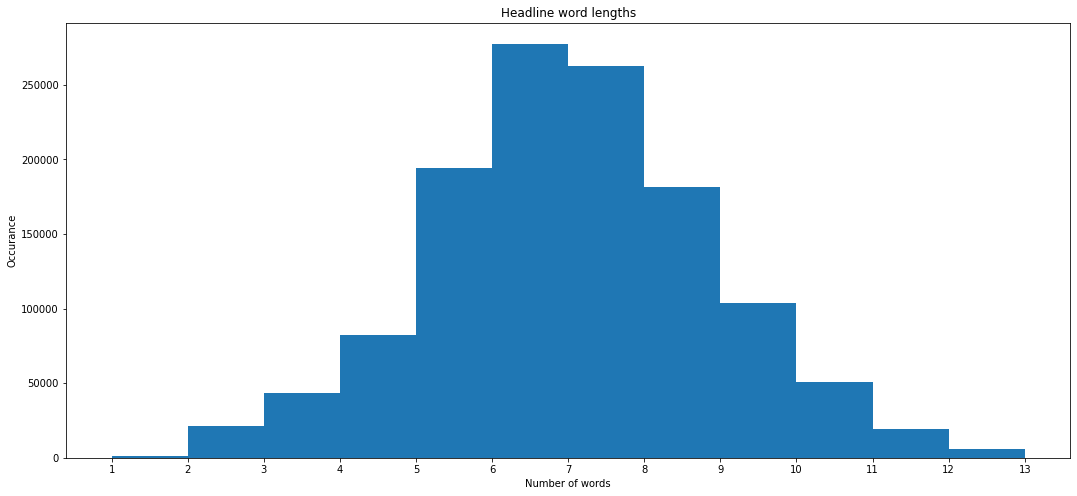

In [ ]:
#setup plots size
fig, ax = plt.subplots(figsize=(18,8))
#use histogram to plot out the distribution of the headline word lengths
ax.hist(word_count_list, bins=range(1,14) )
#create a title
ax.set_title('Headline word lengths')
ax.set_xticks(range(1,14))
#set the x-axis and y-axis name
ax.set_xlabel('Number of words')
ax.set_ylabel('Occurance')
plt.show()

In [25]:
#import count vertorization to count the frequency of occurrance for each word
count_vectorizer = CountVectorizer()
headlines_word_count_vectorizer = count_vectorizer.fit_transform(headlines_list)
words = count_vectorizer.get_feature_names()

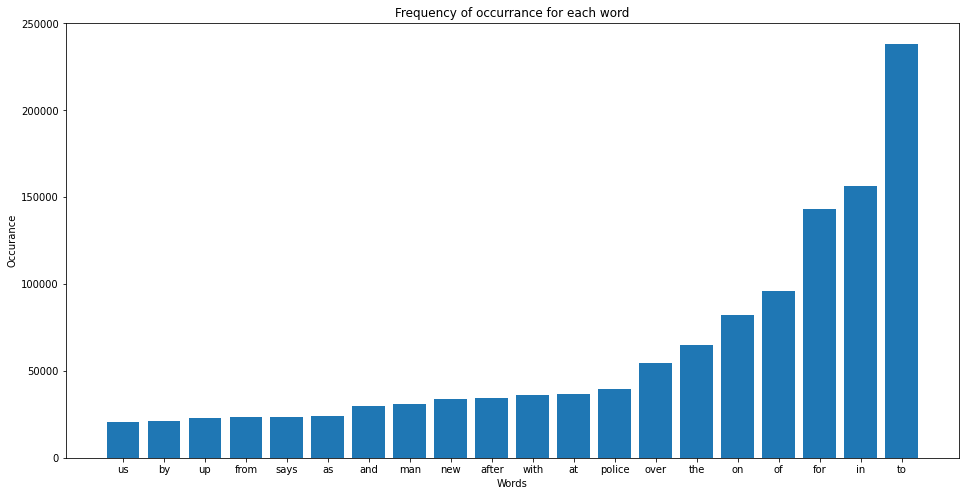

In [26]:
#sum the word on the row axis to obtain the total number of occurance in each word
sum_of_words=headlines_word_count_vectorizer.sum(axis=0)
#convert the list into array
sum_of_word_list = np.squeeze(np.asarray(sum_of_words))
#sort the number of occurance 
sorted_sum_of_words = np.sort(np.squeeze(np.asarray(sum_of_words)))
#get the index of the corresponding sorted words
sorted_sum_of_words_index = np.argsort(np.squeeze(np.asarray(sum_of_words)))
#get the top 20 words occurance and its corresponding words
top_20_words=[words[i] for i in sorted_sum_of_words_index][-20:]
top_20_words_occurrance = [sorted_sum_of_words[i] for i in range(len(sorted_sum_of_words))][-20:]
#set the figure size
fig, ax = plt.subplots(figsize=(16,8))
#set the title of the plot
ax.set_title('Frequency of occurrance for each word')
#use bar graph to plot out the top_20_results
ax.bar(top_20_words, top_20_words_occurrance)
#set the x and y labels
ax.set_xlabel('Words')
ax.set_ylabel('Occurance')
plt.show()

***Data Preprocessing***

In [27]:
#return the number of headlines
df_headlines.shape

(1244184,)

In [28]:
#return the number of headlines after removing duplicates
df_headlines_no_duplicates=df_headlines.drop_duplicates()
df_headlines_no_duplicates.shape

(1213004,)

In [29]:
#load in spacy
nlp = spacy.load("en_core_web_sm")
#set all the words in the headlines to lowercase
def lower_case(s):
  s_lower=s.lower()
  return s_lower

In [30]:
#apply the lowercase function to the dataset
df_headlines_lower_case = df_headlines_no_duplicates.apply(lower_case)

In [32]:
from nltk.corpus.reader.tagged import word_tokenize
import nltk
#downloade the nltk necessary packages for removing the stop words
nltk.download('stopwords')
nltk.download('punkt')
def stop_words(s):
  #tokenize all of the words into sets of list
  tokenize = word_tokenize(s)
  #load in the sets of stopwords
  stop_words = set(stopwords.words('english'))
  #remove the stopwords in the list
  result = [word for word in tokenize if not word in stop_words]
  #join back the lists into string
  out = " ".join(result)
  return out
df_headlines_lower_case=df_headlines_lower_case.apply(stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
#show the results
df_headlines_lower_case

0                 aba decides community broadcasting licence
1                   act fire witnesses must aware defamation
2                   g calls infrastructure protection summit
3                          air nz staff aust strike pay rise
4                 air nz strike affect australian travellers
                                 ...                        
1244179    two aged care residents die state records 2 ; 093
1244180      victoria records 5 ; 919 new cases seven deaths
1244181      wa delays adopting new close contact definition
1244182    western ringtail possums found badly dehydrate...
1244183                  makes close covid contact new rules
Name: headline_text, Length: 1213004, dtype: object

In [34]:
lemma_result=[]
#use spacy to do lemmatizations on the dataset
#the following codes use reference but with modifications: https://stackoverflow.com/questions/44395656/applying-spacy-parser-to-pandas-dataframe-w-multiprocessing
for doc in nlp.pipe(df_headlines_lower_case.astype('unicode').values, batch_size=100, n_process=3):
  if doc.is_parsed:
    lemma_result.append([i.lemma_ for i in doc])
df_headlines_lower_case['lemma']=lemma_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  """


In [35]:
#append the output lemmatization to the dataset with the column name lemma
df_headlines_preprocessed=pd.DataFrame(df_headlines_lower_case['lemma'])

In [36]:
#show the results
df_headlines_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,aba,decide,community,broadcasting,licence,None,None,None,None,None,None,None,None
1,act,fire,witness,must,aware,defamation,None,None,None,None,None,None,None
2,g,call,infrastructure,protection,summit,None,None,None,None,None,None,None,None
3,air,nz,staff,aust,strike,pay,rise,None,None,None,None,None,None
4,air,nz,strike,affect,australian,traveller,None,None,None,None,None,None,None


In [37]:
#Do a intermediate to the preprocessed data
df_headlines_preprocessed.to_csv('/content/drive/MyDrive/preprocessed_abc_1.csv')

In [38]:
#Read from preprocessed data and convert every new line to list
import csv
with open('/content/drive/MyDrive/preprocessed_abc_1.csv', newline='') as preprocessed_data:
    data = list(csv.reader(preprocessed_data))

In [39]:
#look into the data
data[5]

['4',
 'air',
 'nz',
 'strike',
 'affect',
 'australian',
 'traveller',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [40]:
#remove the first element in the list, since it is a header
for index in range(len(data)):
  data[index].pop(0)

In [41]:
#filter out the NONE elements in the list
data =[list(filter(None, i)) for i in data]
del data[0]

In [42]:
#look into the data
data[4]

['air', 'nz', 'strike', 'affect', 'australian', 'traveller']

In [43]:
#filter out the number of words length is smaller equal to 2
data =[list(filter(lambda element: len(element)!=2, i)) for i in data]
data =[list(filter(lambda element: len(element)!=1, i)) for i in data]

In [44]:
#save it into the pandas frameworks
df_headlines_final=pd.DataFrame(list(zip(data)), columns=['headlines_array'])

In [45]:
#display the results
df_headlines_final.head()

,headlines_array
0,"[aba, decide, community, broadcasting, licence]"
1,"[act, fire, witness, must, aware, defamation]"
2,"[call, infrastructure, protection, summit]"
3,"[air, staff, aust, strike, pay, rise]"
4,"[air, strike, affect, australian, traveller]"


In [46]:
from gensim import corpora, models
#load in gensim and convert the each list of headlines into dictionary
dict_of_inputs = corpora.Dictionary(df_headlines_final['headlines_array'])

In [47]:
#convert the list of words into bag-of-words
input_corpous=[dict_of_inputs.doc2bow(input) for input in df_headlines_final['headlines_array']]

In [49]:
#load TF-IDF vectorization.
model = models.TfidfModel(input_corpous)

In [50]:
#transform the input data
tfidf_input=model[input_corpous]

In [51]:
#display the results
tfidf_input[0]

[(0, 0.5561735474286991),
 (1, 0.5617641744043795),
 (2, 0.2891502255588444),
 (3, 0.3849011978382397),
 (4, 0.3785963714278047)]

***Load models and train***

In [52]:
import time
#start a timer
start_time=time.time()
#load in LDA model and train the model with our data
LDA = models.LdaMulticore(tfidf_input, num_topics=10, id2word=dict_of_inputs)
#calculate the time it takes to finish the algorithm
print('The execution is: %s' %(time.time()-start_time))

The execution is: 369.32552886009216


In [53]:
#display the topics and corresponding words with weights for LDA
for idx, topic in LDA.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.013*"crash" + 0.011*"die" + 0.011*"royal" + 0.010*"police" + 0.010*"kill" + 0.010*"car" + 0.008*"northern" + 0.008*"man" + 0.008*"dead" + 0.007*"social"
Topic: 1 Word: 0.027*"vaccine" + 0.027*"covid" + 0.018*"coronavirus" + 0.017*"quarantine" + 0.015*"pandemic" + 0.011*"case" + 0.010*"speak" + 0.008*"record" + 0.008*"tasmanian" + 0.008*"outbreak"
Topic: 2 Word: 0.009*"abc" + 0.009*"zealand" + 0.008*"country" + 0.007*"due" + 0.007*"morning" + 0.007*"covid" + 0.007*"johnson" + 0.007*"new" + 0.007*"michael" + 0.007*"positive"
Topic: 3 Word: 0.022*"lockdown" + 0.016*"morrison" + 0.015*"people" + 0.013*"man" + 0.012*"police" + 0.012*"hotel" + 0.011*"charge" + 0.010*"murder" + 0.009*"woman" + 0.008*"testing"
Topic: 4 Word: 0.020*"coronavirus" + 0.018*"restriction" + 0.016*"covid" + 0.015*"news" + 0.012*"border" + 0.012*"scott" + 0.012*"tasmania" + 0.009*"travel" + 0.009*"update" + 0.009*"nsw"
Topic: 5 Word: 0.028*"queensland" + 0.020*"government" + 0.017*"victoria" + 0.015*"

In [54]:
import time
#start a timer
start_time=time.time()
#load in NMF model and train the model with our data
NMF = models.nmf.Nmf(tfidf_input, num_topics=10, id2word=dict_of_inputs)
#calculate the time it takes to finish the algorithm
print('The execution is: %s' %(time.time()-start_time))

The execution is: 507.783762216568


In [55]:
#display the topics and corresponding words with weights for NMF
for idx, topic in NMF.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.097*"council" + 0.012*"consider" + 0.010*"water" + 0.010*"not" + 0.009*"fund" + 0.009*"rate" + 0.009*"call" + 0.008*"urge" + 0.007*"back" + 0.007*"rise"
Topic: 1 Word: 0.074*"man" + 0.059*"charge" + 0.037*"court" + 0.035*"face" + 0.026*"murder" + 0.013*"accuse" + 0.013*"assault" + 0.012*"jail" + 0.010*"sex" + 0.010*"drug"
Topic: 2 Word: 0.145*"iraq" + 0.029*"troop" + 0.023*"attack" + 0.017*"soldier" + 0.015*"say" + 0.011*"bush" + 0.011*"australian" + 0.011*"report" + 0.010*"bomb" + 0.007*"kill"
Topic: 3 Word: 0.021*"new" + 0.015*"claim" + 0.014*"world" + 0.012*"cup" + 0.010*"seek" + 0.007*"farmer" + 0.007*"australia" + 0.007*"get" + 0.006*"find" + 0.006*"nsw"
Topic: 4 Word: 0.097*"plan" + 0.014*"water" + 0.013*"new" + 0.010*"back" + 0.006*"group" + 0.005*"health" + 0.004*"power" + 0.004*"boost" + 0.004*"labor" + 0.004*"win"
Topic: 5 Word: 0.141*"police" + 0.022*"investigate" + 0.013*"officer" + 0.011*"arrest" + 0.011*"probe" + 0.011*"death" + 0.010*"search" + 0.009*"hu

In [56]:
import time
#start a timer
start_time=time.time()
#load in LSA model and train the model with our data
LSA = models.LsiModel(tfidf_input, num_topics=10, id2word=dict_of_inputs)
#calculate the time it takes to finish the algorithm
print('The execution is: %s' %(time.time()-start_time))


The execution is: 397.83621978759766


In [57]:
#display the topics and corresponding words with weights for LSA
for idx, topic in LSA.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.453*"man" + 0.371*"police" + 0.288*"charge" + 0.162*"court" + 0.145*"murder" + 0.132*"face" + 0.123*"crash" + 0.121*"woman" + 0.117*"new" + 0.116*"death"
Topic: 1 Word: -0.408*"man" + -0.274*"charge" + 0.235*"govt" + 0.230*"new" + 0.212*"plan" + 0.196*"council" + 0.139*"say" + 0.134*"urge" + 0.122*"call" + -0.118*"murder"
Topic: 2 Word: 0.789*"police" + -0.255*"man" + -0.243*"charge" + -0.185*"court" + -0.175*"face" + 0.137*"probe" + 0.131*"investigate" + -0.126*"govt" + 0.090*"miss" + 0.089*"search"
Topic: 3 Word: -0.847*"govt" + -0.196*"urge" + 0.156*"coronavirus" + 0.152*"new" + 0.138*"kill" + -0.128*"police" + 0.113*"australia" + 0.081*"crash" + 0.076*"australian" + 0.062*"day"
Topic: 4 Word: -0.583*"kill" + -0.379*"crash" + -0.219*"govt" + 0.195*"police" + -0.194*"iraq" + 0.184*"council" + 0.182*"plan" + -0.178*"car" + 0.169*"charge" + 0.116*"face"
Topic: 5 Word: -0.825*"coronavirus" + -0.238*"covid" + 0.215*"council" + 0.194*"plan" + -0.168*"govt" + -0.154*"case"

***Evaluation***

In [59]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_texts, common_dictionary
common_text1 = data
common_dict = dict_of_inputs
#load in the coherence metric and use our data as a reference text to calculate the U_MASS coherence score for LDA
cm_LDA = CoherenceModel(model=LDA, texts=common_text1, dictionary=common_dict, coherence='u_mass')
#get the coherence value
coherence_score_LDA = cm_LDA.get_coherence()
#load in the coherence metric and use our data as a reference text to calculate the U_MASS coherence score for NMF
cm_NMF = CoherenceModel(model=NMF, texts=common_text1, dictionary=common_dict, coherence='u_mass')
#get the coherence value
coherence_score_NMF = cm_NMF.get_coherence()
#load in the coherence metric and use our data as a reference text to calculate the U_MASS coherence score for LSA
cm_LSA = CoherenceModel(model=LSA, texts=common_text1, dictionary=common_dict, coherence='u_mass')
#get the coherence value
coherence_score_LSA = cm_LSA.get_coherence()

In [60]:
#print out the scores for each models
print(f'The LDA Coherence Score is: ', coherence_score_LDA)
print(f'The NMF Coherence Score is: ', coherence_score_NMF)
print(f'The LSA Coherence Score is: ', coherence_score_LSA)

The LDA Coherence Score is:  -7.270243543551418
The NMF Coherence Score is:  -5.014463420450444
The LSA Coherence Score is:  -5.459129311186574


In [61]:
def get_topic(model):
  output=[]
  #get each topic
  for i in model.get_topics():
    #get the index of the top 10 words according to the weights got assigned
    top_10=list(reversed(np.argsort(i)))[:10]
    #use the index to obtain the top 10 words
    top_10_words = [dict_of_inputs[j] for j in top_10]
    output.append(top_10_words)
  return output

In [62]:
output_NMF={}
output_LDA={}
output_LSA={}
#obtain the top 10 words for NMF output
topic_words_NMF = get_topic(NMF)
#obtain the top 10 words for LDA output
topic_words_LDA = get_topic(LDA)
#obtain the top 10 words for LSA output
topic_words_LSA = get_topic(LSA)
#save the results for each model in the corresponding dictionary which will be used for calculation diversity metric
output_NMF['topics']=topic_words_NMF
output_LDA['topics']=topic_words_LDA
output_LSA['topics']=topic_words_LSA

In [63]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
#from OCTIS load in Topic Diversity Metrics
topic_diversity = TopicDiversity(topk=10)
#obtain topic diversity for NMF
diversity_score_NMF = topic_diversity.score(output_NMF)
#obtain topic diversity for LDA
diversity_score_LDA = topic_diversity.score(output_LDA)
#obtain topic diversity for LSA
diversity_score_LSA = topic_diversity.score(output_LSA)

In [64]:
#print out the diversity score for each model
print(f'The LDA Topic Diversity Score is: ', diversity_score_LDA)
print(f'The NMF Topic Diversity Score is: ', diversity_score_NMF)
print(f'The LSA Topic Diversity Score is: ', diversity_score_LSA)

The LDA Topic Diversity Score is:  0.91
The NMF Topic Diversity Score is:  0.81
The LSA Topic Diversity Score is:  0.57


In [65]:
from octis.evaluation_metrics.similarity_metrics import RBO
#from OCTIS load in Topic similarity Metrics
similarity = RBO(topk=10)
#obtain topic similarity for NMF
similarity_NMF = similarity.score(output_NMF)
#obtain topic similarity for LDA
similarity_LDA = similarity.score(output_LDA)
#obtain topic similarity for LSA
similarity_LSA = similarity.score(output_LSA)

In [66]:
#print out the similarity score for each model
print(f'The LDA Topic Similarity Score is: ', similarity_LDA)
print(f'The NMF Topic Similarity Score is: ', similarity_NMF)
print(f'The LSA Topic Similarity Score is: ', similarity_LSA)

The LDA Topic Similarity Score is:  0.02588911445285713
The NMF Topic Similarity Score is:  0.02706041975571427
The LSA Topic Similarity Score is:  0.1352892529836508


In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#load the wordcloud tool to show the most important words by size
def plot_wordcloud(model, topic_num):
  wordcloud = WordCloud(
      background_color='white',
      width=2500,
      height=1800,
      max_words=10
  )
  #plot the wordcloud with different models
  topic_words=dict(model.show_topics(formatted=False)[topic_num][1])
  wordcloud.generate_from_frequencies(topic_words)
  plt.imshow(wordcloud)
  #set the axis and title
  plt.axis('off')
  plt.title('Topic %d' %topic_num)


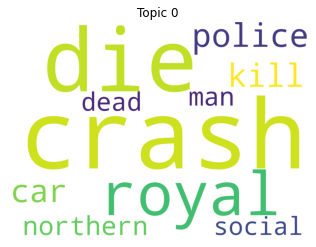

In [68]:
#plot the LDA topic 0 wordcloud
plot_wordcloud(LDA,0)

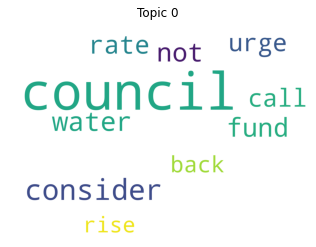

In [69]:
#plot the NMF topic 0 wordcloud
plot_wordcloud(NMF,0)

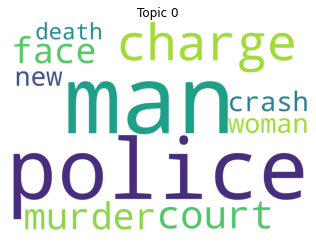

In [70]:
#plot the LSA topic 0 wordcloud
plot_wordcloud(LSA,0)

In [75]:
from collections import Counter
#the function gets the distribution for topic using the entire input corpus
def get_topic_dis(model):
  #get the document topics distribution from entire input corpus
  a=model.get_document_topics(input_corpous)
  results=[]
  #parse the result topics distribution into list since the output from previous step is in TransformedCorpus we need to list type
  for i in range(len(a)):
    results.append(a[i])
  final=[]
  #convert the list of topics distribution into dictionary
  for j in range(len(results)):
    temp = list(dict(results[j]).values())
    final.append(np.array(temp[:10]))
  #get the value distribution dictionary and form an array
  res = np.asarray(final, dtype=object)

  keys=[]
  #find in each headline of the input corpus get the most likely topic and put it in array
  for k in range(len(res)):
    keys.append(res[k].argmax(axis=0))
  final_keys=np.array(keys)
  #use counter to count occurance for each topic given the input corpus
  P =Counter(final_keys).items()
  num_topics=[pair[0] for pair in P]
  counts=[pair[1] for pair in P]
  return num_topics, counts

In [104]:
from collections import Counter
#the function gets the distribution for terms in each topic
def get_topic_distribution(model):
  #get the term-topic distribution and sort the topics according to each term
  gens_keys = model.get_topics().argmax(axis=0)
  #count for each term what topic does it most likely belong to
  pairs =Counter(gens_keys).items()
  num_topics=[pair[0] for pair in pairs]
  counts=[pair[1] for pair in pairs]
  return num_topics, counts

In [76]:
#find out the the distribution of topics given each document for LDA
num_topics_LDA, counts_LDA = get_topic_dis(LDA)

In [105]:
#find out the the distribution of topics given each term for NMF
num_topics_NMF, counts_NMF = get_topic_distribution(NMF)
#find out the the distribution of topics given each term for LSA
num_topics_LSA, counts_LSA = get_topic_distribution(LSA)
#find out the the distribution of topics given each term for LDA
num_topics_LDA_dis, counts_LDA_dis = get_topic_distribution(LDA)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as genvis
#use pyLDAvis to visualize the topic distribution for LDA model given the documents
pyLDAvis.enable_notebook()
vis=genvis.prepare(LDA, input_corpous, dict_of_inputs)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.115268  0.144812       1        1  13.407513
4      0.320711  0.120369       2        1  13.296756
8      0.030383 -0.316731       3        1   9.990417
5     -0.090019  0.062768       4        1   9.900102
1      0.067367  0.042243       5        1   9.531704
6     -0.122072 -0.123064       6        1   9.349761
3     -0.002891  0.107927       7        1   9.334027
2     -0.101419  0.067348       8        1   9.144665
0      0.149603 -0.111110       9        1   8.598290
7     -0.136396  0.005437      10        1   7.446765, topic_info=            Term          Freq         Total Category  logprob  loglift
2402  queensland  19186.000000  19186.000000  Default  30.0000  30.0000
9634       trump  17538.000000  17538.000000  Default  29.0000  29.0000
2735      border  17635.000000  17635.000000  Default  28.0000  28.0000
440      vaccine  16338.000000  16338.000000  Default  27.0000  27.0000
1751    victoria  20331.000000  20331.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1047        post   2347.635899   3447.567019  Topic10  -5.3260   2.2131
341         case   4190.208783  23990.205820  Topic10  -4.7467   0.8525
45     australia   3487.729782  31430.550323  Topic10  -4.9302   0.3989
433          new   2729.845287  25537.533420  Topic10  -5.1752   0.3615
799         late   2039.582684   4376.772177  Topic10  -5.4667   1.8338

[470 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
3920       6  0.999209      100
49371     10  0.999005     2019
14167      6  0.999766     2020
38175      1  0.000272     2021
38175      3  0.998271     2021
...      ...       ...      ...
407        3  0.123496    young
407        4  0.008295    young
407        9  0.602920    young
435        3  0.999614  zealand
11183      6  0.999446     zero

[802 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 9, 6, 2, 7, 4, 3, 1, 8])

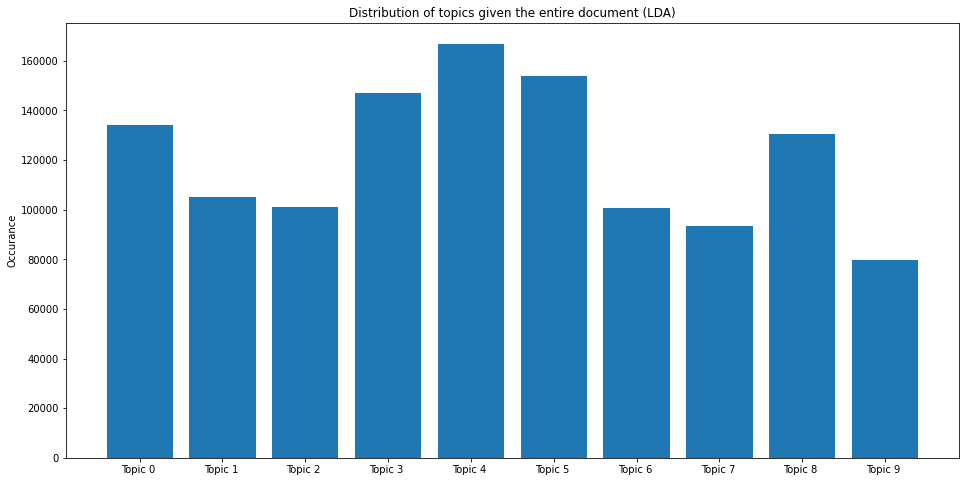

In [107]:
#draw out the distribution for topic given the entire document for LDA model
labels=['Topic {} '.format(i) for i in num_topics_LDA]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Distribution of topics given the entire document (LDA)')
ax.bar(num_topics_LDA, counts_LDA)
ax.set_xticks(num_topics_LDA)
ax.set_xticklabels(labels)
ax.set_ylabel('Occurance')
plt.show()

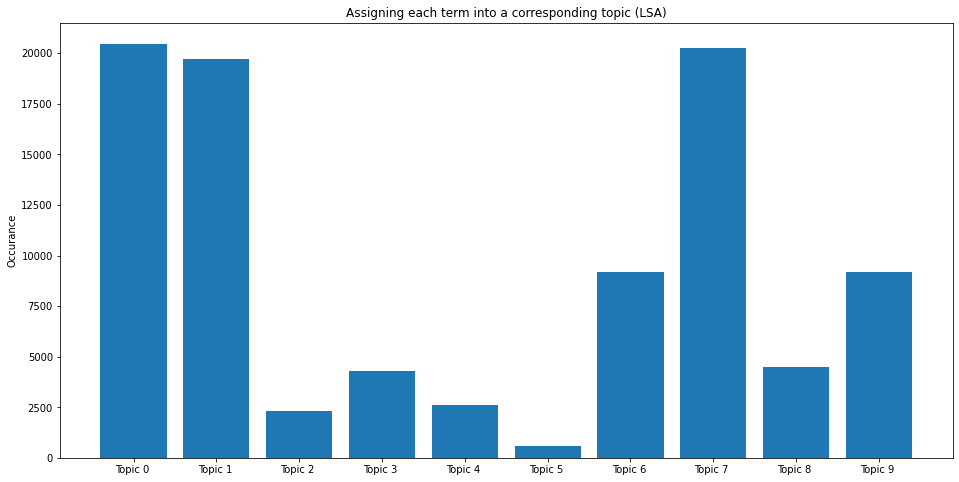

In [108]:
#draw out the distribution for topics given each term for LSA model
labels=['Topic {} '.format(i) for i in num_topics_LSA]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Assigning each term into a corresponding topic (LSA)')
ax.bar(num_topics_LSA, counts_LSA)
ax.set_xticks(num_topics_LSA)
ax.set_xticklabels(labels)
ax.set_ylabel('Occurance')
plt.show()

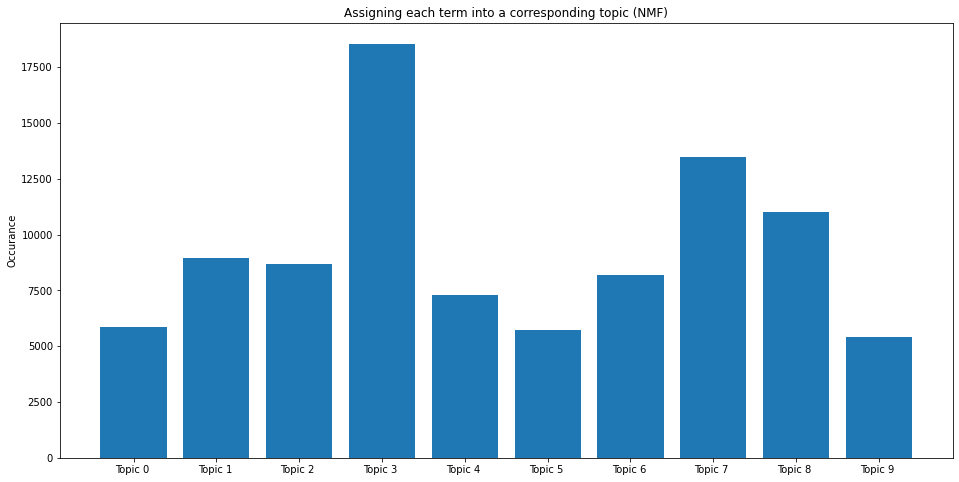

In [109]:
#draw out the distribution for topics given each term for NMF model
labels=['Topic {} '.format(i) for i in num_topics_NMF]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Assigning each term into a corresponding topic (NMF)')
ax.bar(num_topics_NMF, counts_NMF)
ax.set_xticks(num_topics_NMF)
ax.set_xticklabels(labels)
ax.set_ylabel('Occurance')
plt.show()

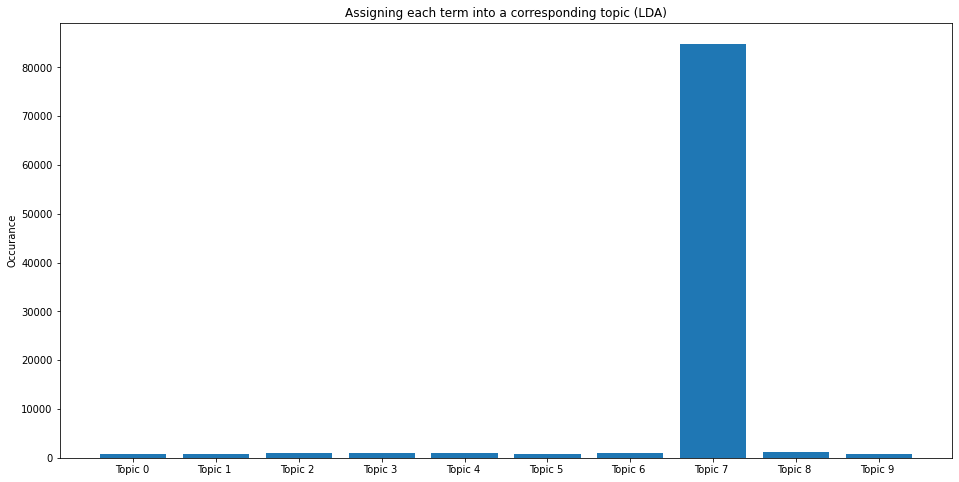

In [110]:
#draw out the distribution for topics given each term for LDA model
labels=['Topic {} '.format(i) for i in num_topics_LDA_dis]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Assigning each term into a corresponding topic (LDA)')
ax.bar(num_topics_LDA_dis, counts_LDA_dis)
ax.set_xticks(num_topics_LDA_dis)
ax.set_xticklabels(labels)
ax.set_ylabel('Occurance')
plt.show()